In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [5]:
df=pd.read_csv("Production.csv.csv" ,encoding = "ISO-8859-1")
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production        object
dtype: object

In [6]:
#indian agricultural production dataset
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165


In [7]:
#converting production to numeric type
df['Production']=pd.to_numeric(df['Production'],errors='coerce')

In [8]:
#grouping area and production for each year by mean
data=df.groupby(['Crop_Year'])['Area','Production'].mean()
data=data.reset_index(level=0, inplace=False)
data

<ipython-input-8-ae108dc10b37>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data=df.groupby(['Crop_Year'])['Area','Production'].mean()


,Crop_Year,Area,Production
0,1997,26038.324081,9.565489e+04
1,1998,14479.153906,5.172545e+05
2,1999,12678.074790,5.172145e+05
3,2000,12102.612169,5.496723e+05
4,2001,12371.499489,5.616144e+05
5,2002,9463.680476,4.654666e+05
6,2003,9954.769395,4.619857e+05
7,2004,11891.933465,5.909555e+05
8,2005,11822.333236,5.949085e+05
9,2006,11913.672644,6.211571e+05


In [9]:
#calulation cpi(  )


data['CPI']=data['Production']/data['Area']
data.head()

,Crop_Year,Area,Production,CPI
0,1997,26038.324081,95654.894483,3.673619
1,1998,14479.153906,517254.540970,35.724086
2,1999,12678.074790,517214.531396,40.795984
3,2000,12102.612169,549672.332849,45.417661
4,2001,12371.499489,561614.446722,45.395827


In [10]:
#discriptive analysis
data.describe()


,Crop_Year,Area,Production,CPI
count,19.000000,19.000000,1.900000e+01,19.000000
mean,2006.000000,12141.402985,5.496053e+05,48.098207
std,5.627314,3633.397954,2.364676e+05,22.993961
min,1997.000000,8187.362989,1.236197e+04,1.509884
25%,2001.500000,10531.577629,4.737958e+05,43.095905
50%,2006.000000,11768.527148,5.496723e+05,46.408482
75%,2010.500000,12237.055829,6.073395e+05,51.229452
max,2015.000000,26038.324081,1.037554e+06,95.030260


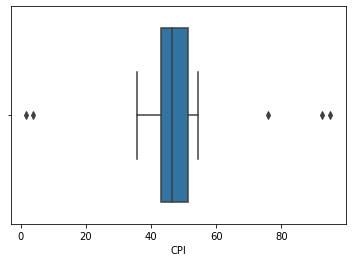

In [11]:
#boxplot plotting
import seaborn as sns
sns.boxplot(x=data['CPI'])

In [12]:
data = data[np.isfinite(data['CPI'])]
data=data[data.CPI >43]
data=data[data.CPI <51]
data.set_index('Crop_Year')
data

,Crop_Year,Area,Production,CPI
3,2000,12102.612169,549672.332849,45.417661
4,2001,12371.499489,561614.446722,45.395827
5,2002,9463.680476,465466.567649,49.184519
6,2003,9954.769395,461985.734566,46.408482
7,2004,11891.933465,590955.527122,49.693814
8,2005,11822.333236,594908.463112,50.320732
10,2007,10513.848637,482125.050009,45.856191
11,2008,11768.527148,542306.282654,46.081067
12,2009,11738.077997,556438.877374,47.404599


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002067710DBE0>,
      dtype=object)

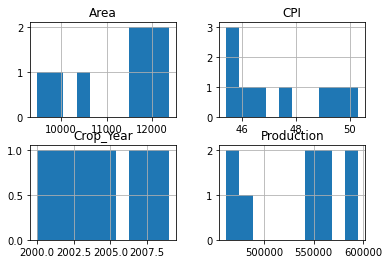

In [13]:
#plotting histogram
data.hist()

C:\Users\Versh\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


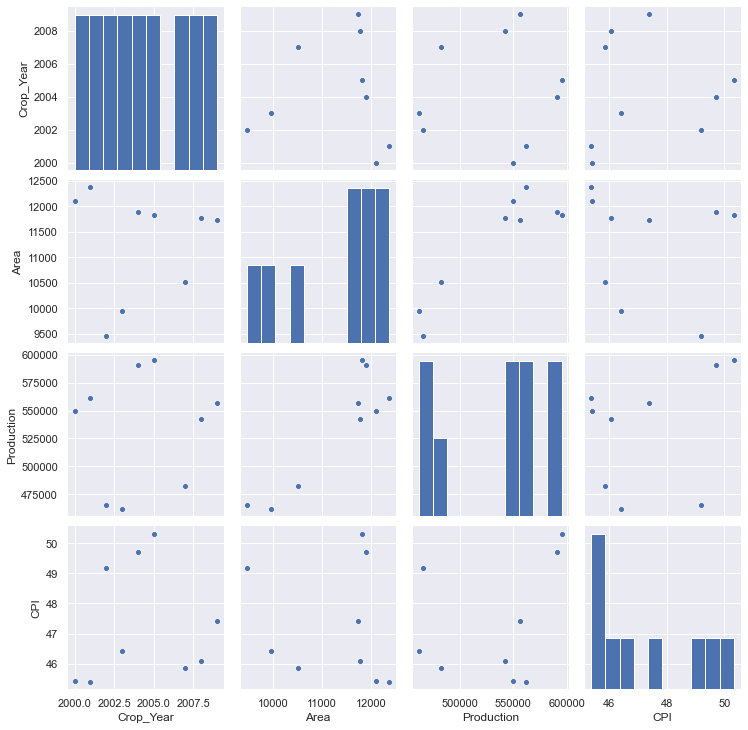

In [17]:
#scatterplot
sns.set()
cols = ['Crop_Year', 'Area', 'Production', 'CPI']
sns.pairplot(data[cols], size = 2.5)
plt.show();

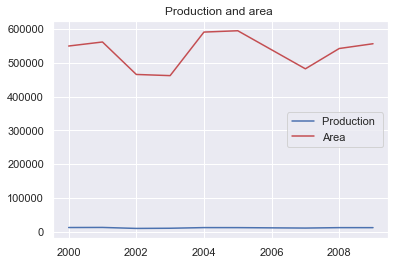

In [18]:
#comparison of production and area for each year
x_axis=data.Crop_Year
y_axis=data.Area

y1_axis=data.Production

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')

plt.title("Production and area ")
plt.legend(["Production ","Area"])
plt.show()


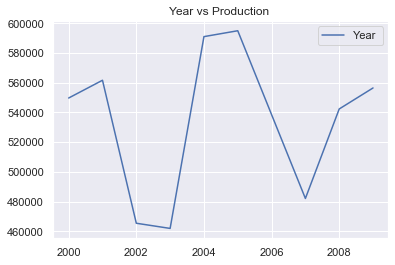

In [19]:
#plotting of production
x_axis=data.Crop_Year
y1_axis=data.Production



plt.plot(x_axis,y1_axis)

plt.title("Year vs Production ")
plt.legend(["Year ","Production"])
plt.show()

In [20]:
#importing random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split

In [21]:
#splitting and fitting of the model
x=data.iloc[:,0:1].values
y=data.iloc[:,3].values
regressor=RandomForestRegressor(n_estimators=12,random_state=0,n_jobs=1,verbose=13)

regressor.fit(x,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12


RandomForestRegressor(n_estimators=12, n_jobs=1, random_state=0, verbose=13)

In [22]:
#predicting for the test values
y_pred=regressor.predict(x)
y_pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

array([45.726107  , 45.71519001, 48.00600917, 47.33382739, 48.92472398,
       49.51196079, 46.71271891, 46.54466636, 47.0961381 ])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

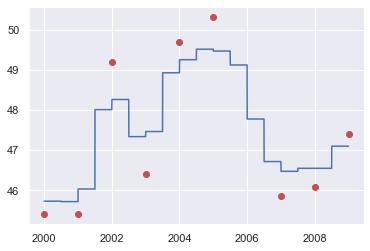

In [23]:
#random forest steps plotting
x_grid=np.arange(min(x),max(x),0.001)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(x,y,color='r')
plt.plot(x_grid,regressor.predict(x_grid),color='b')
a=plt.show()
a

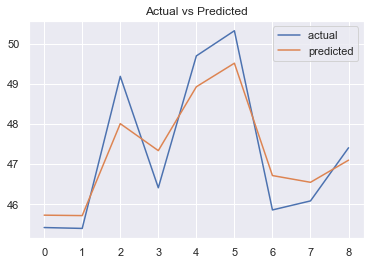

In [28]:
#regression model
#actual and predicted values
dm = pd.DataFrame({'Actual': y, 'Predicted': y_pred}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
y1_axis=dm.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
b=plt.show()
b